In [9]:
import pandas as pd
from pandas import DataFrame as df
import kagglehub
import numpy as np
import matplotlib as mat
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Download latest version
path1 = kagglehub.dataset_download("erikbruin/countries-of-the-world-iso-codes-and-population")

print("Path to dataset files:", path1)

# Download latest version
path2 = kagglehub.dataset_download("gpreda/covid-world-vaccination-progress")

print("Path to dataset files:", path2)

path3 = kagglehub.dataset_download("mayuneko/life-expectancy-global-trend")

print("Path to dataset files:", path3)

path4 = kagglehub.dataset_download("ahmdfatihin/world-population-incomegdp-and-life-expectancy")

print("Path to dataset files:", path4)


Path to dataset files: /Users/shashankverma/.cache/kagglehub/datasets/erikbruin/countries-of-the-world-iso-codes-and-population/versions/2
Path to dataset files: /Users/shashankverma/.cache/kagglehub/datasets/gpreda/covid-world-vaccination-progress/versions/249
Path to dataset files: /Users/shashankverma/.cache/kagglehub/datasets/mayuneko/life-expectancy-global-trend/versions/5
Path to dataset files: /Users/shashankverma/.cache/kagglehub/datasets/ahmdfatihin/world-population-incomegdp-and-life-expectancy/versions/1


#### Read the inputs (CSV Files)

In [10]:

vaccinations = pd.read_csv(path2+"/country_vaccinations.csv", header=0)
country_populations = pd.read_csv(path1+"/countries_by_population_2019.csv", header=0)
country_populations = country_populations.rename(columns = {"name": "country"})
country_pop2020 = pd.read_csv(path4+"/population_total.csv", header=0)
country_pop2020 = country_pop2020[['country', '2020']]
country_pop2020 = country_pop2020.rename(columns = {"2020":"Population_2020"})
country_total = pd.read_csv(path4+"/countries_total.csv", header=0)
country_total = country_total.rename(columns = {"name": "country"})
vaccinesby_manufacturer = pd.read_csv(path2+"/country_vaccinations_by_manufacturer.csv", header=0)
vaccinesby_manufacturer =vaccinesby_manufacturer.rename(columns = {"location":"country"})



Index(['index', 'country', 'vaccine', 'countryTotalByVaccine', 'region'], dtype='object')
    index country             vaccine  countryTotalByVaccine region
29     29  Cyprus     Johnson&Johnson                 916815   Asia
30     30  Cyprus             Moderna                4782633   Asia
31     31  Cyprus             Novavax                     59   Asia
32     32  Cyprus  Oxford/AstraZeneca               11399329   Asia
33     33  Cyprus     Pfizer/BioNTech               37964572   Asia
Americas
   index    country             vaccine  countryTotalByVaccine    region
0      0  Argentina             CanSino               53950431  Americas
1      1  Argentina             Moderna              893386753  Americas
2      2  Argentina  Oxford/AstraZeneca             5618580845  Americas
3      3  Argentina     Pfizer/BioNTech             1307660776  Americas
4      4  Argentina   Sinopharm/Beijing             5713239160  Americas
Europe
    index  country             vaccine  countryT

" \n    if x < 1000000:\n    #Anything less than a million\n        return  '{:1.0f}K'.format(x * 1e-3)\n    elif (x >= 1000000 and x < 1000000000):\n    #Anything less than a billion\n        return '{:1.0f}M'.format(x * 1e-6)\n    else:\n    #At least a billion\n        return '{:1.0f}B'.format(x * 1e-10)\n"

<Figure size 2000x1000 with 0 Axes>

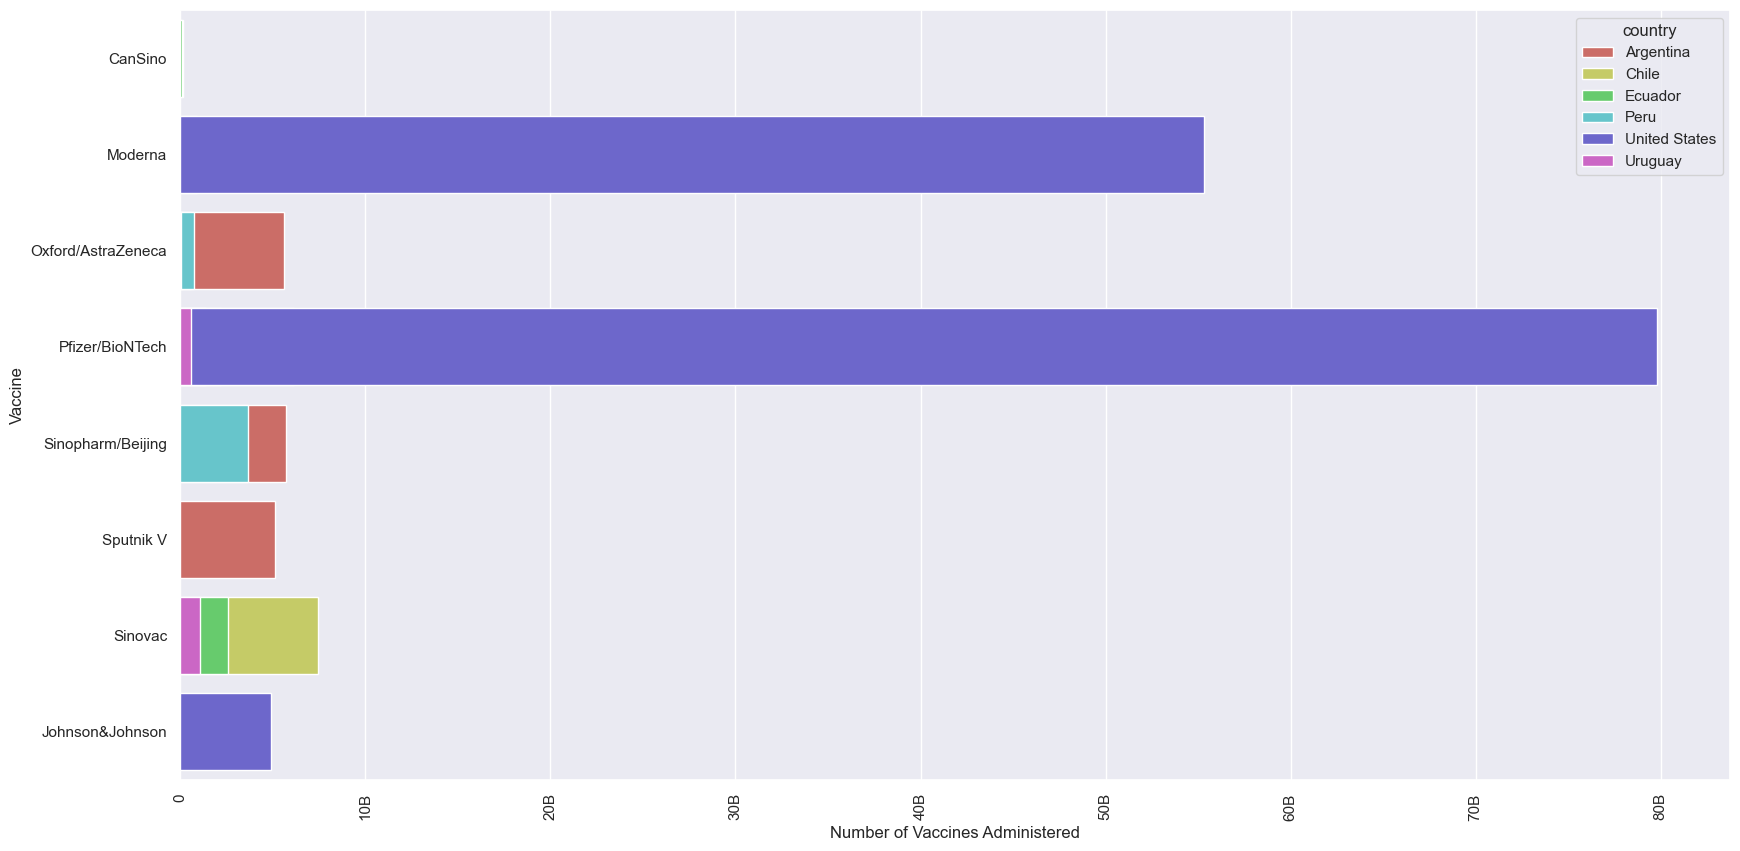

<Figure size 2000x1000 with 0 Axes>

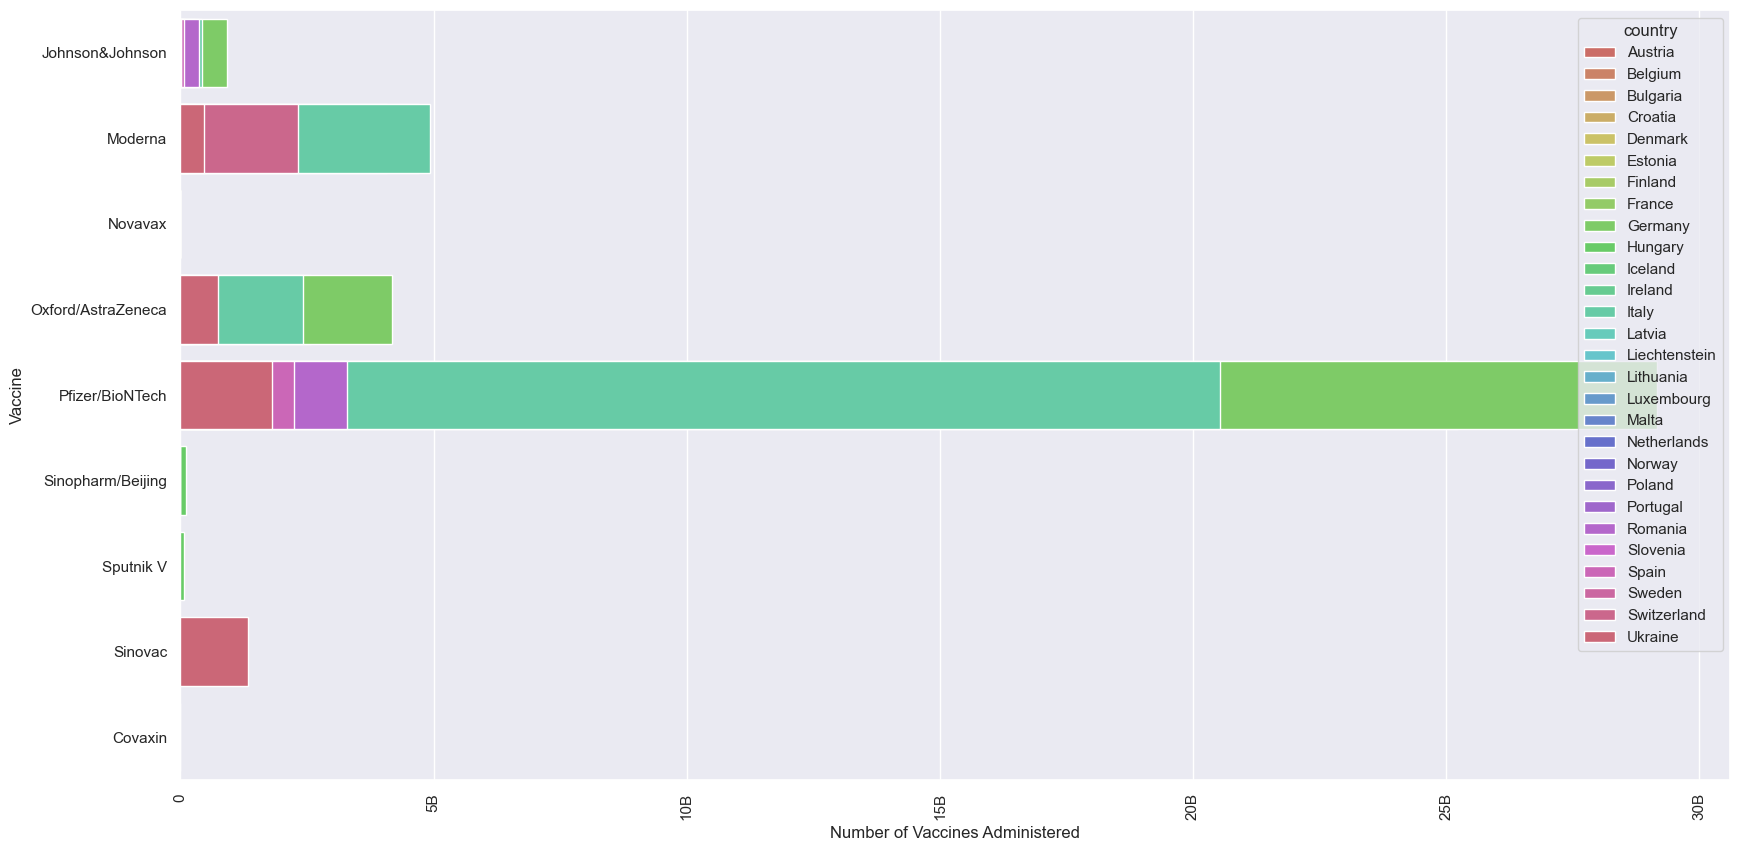

<Figure size 2000x1000 with 0 Axes>

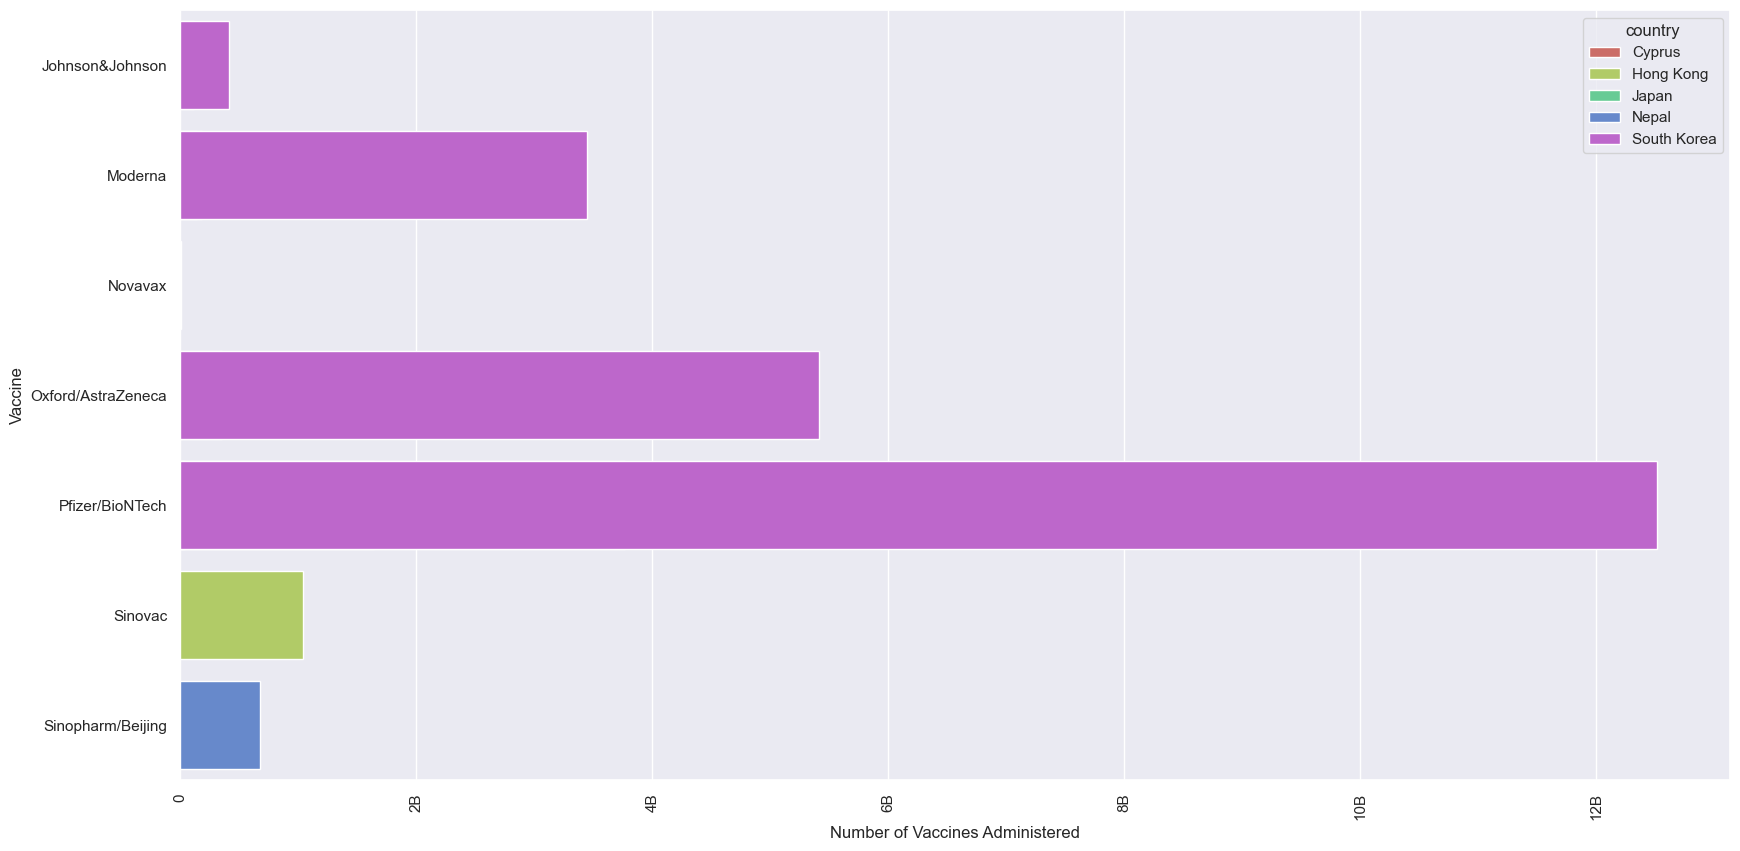

<Figure size 2000x1000 with 0 Axes>

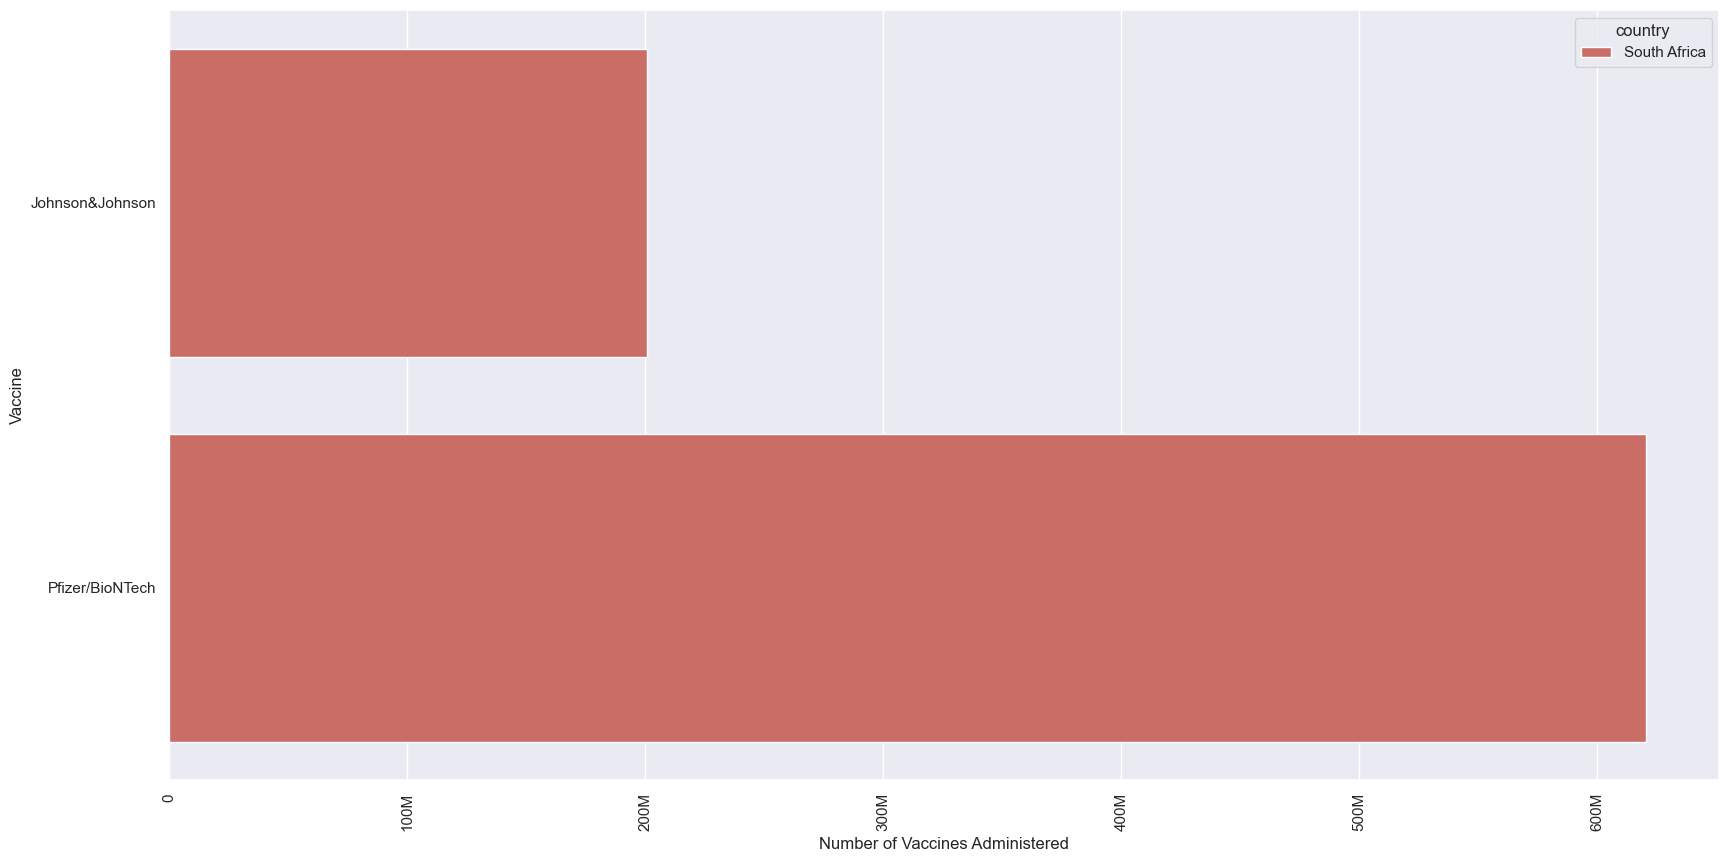

<Figure size 640x480 with 0 Axes>

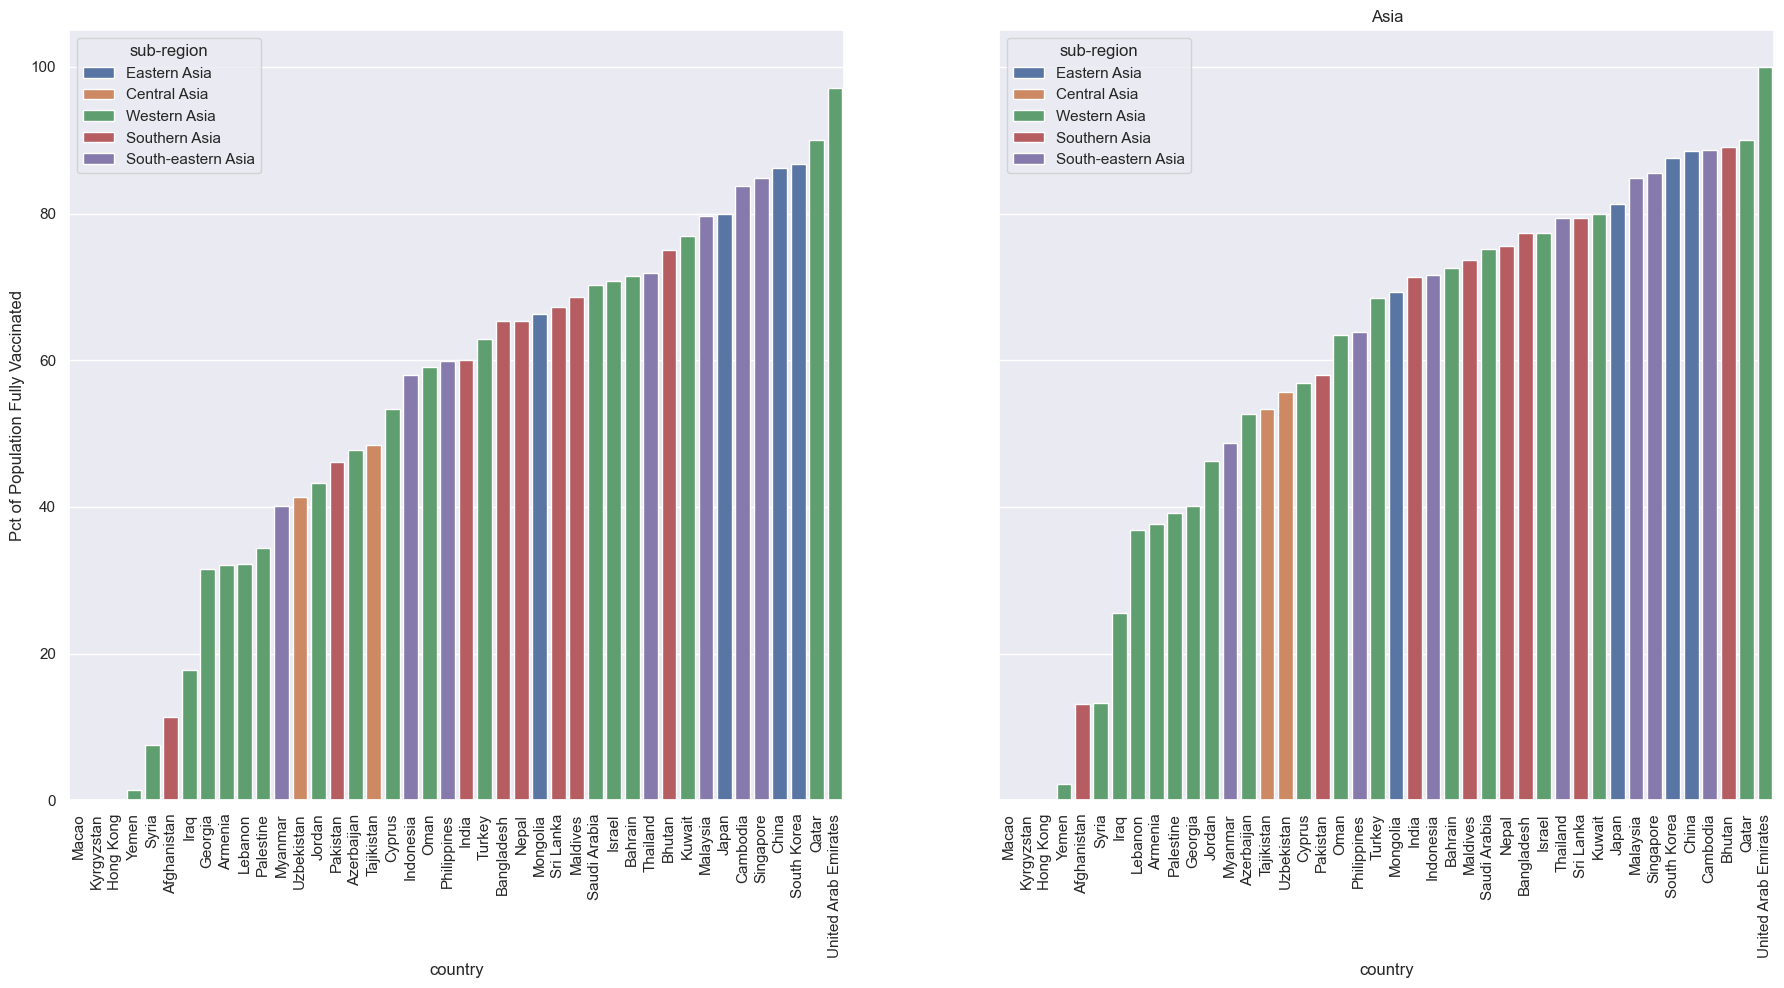

<Figure size 640x480 with 0 Axes>

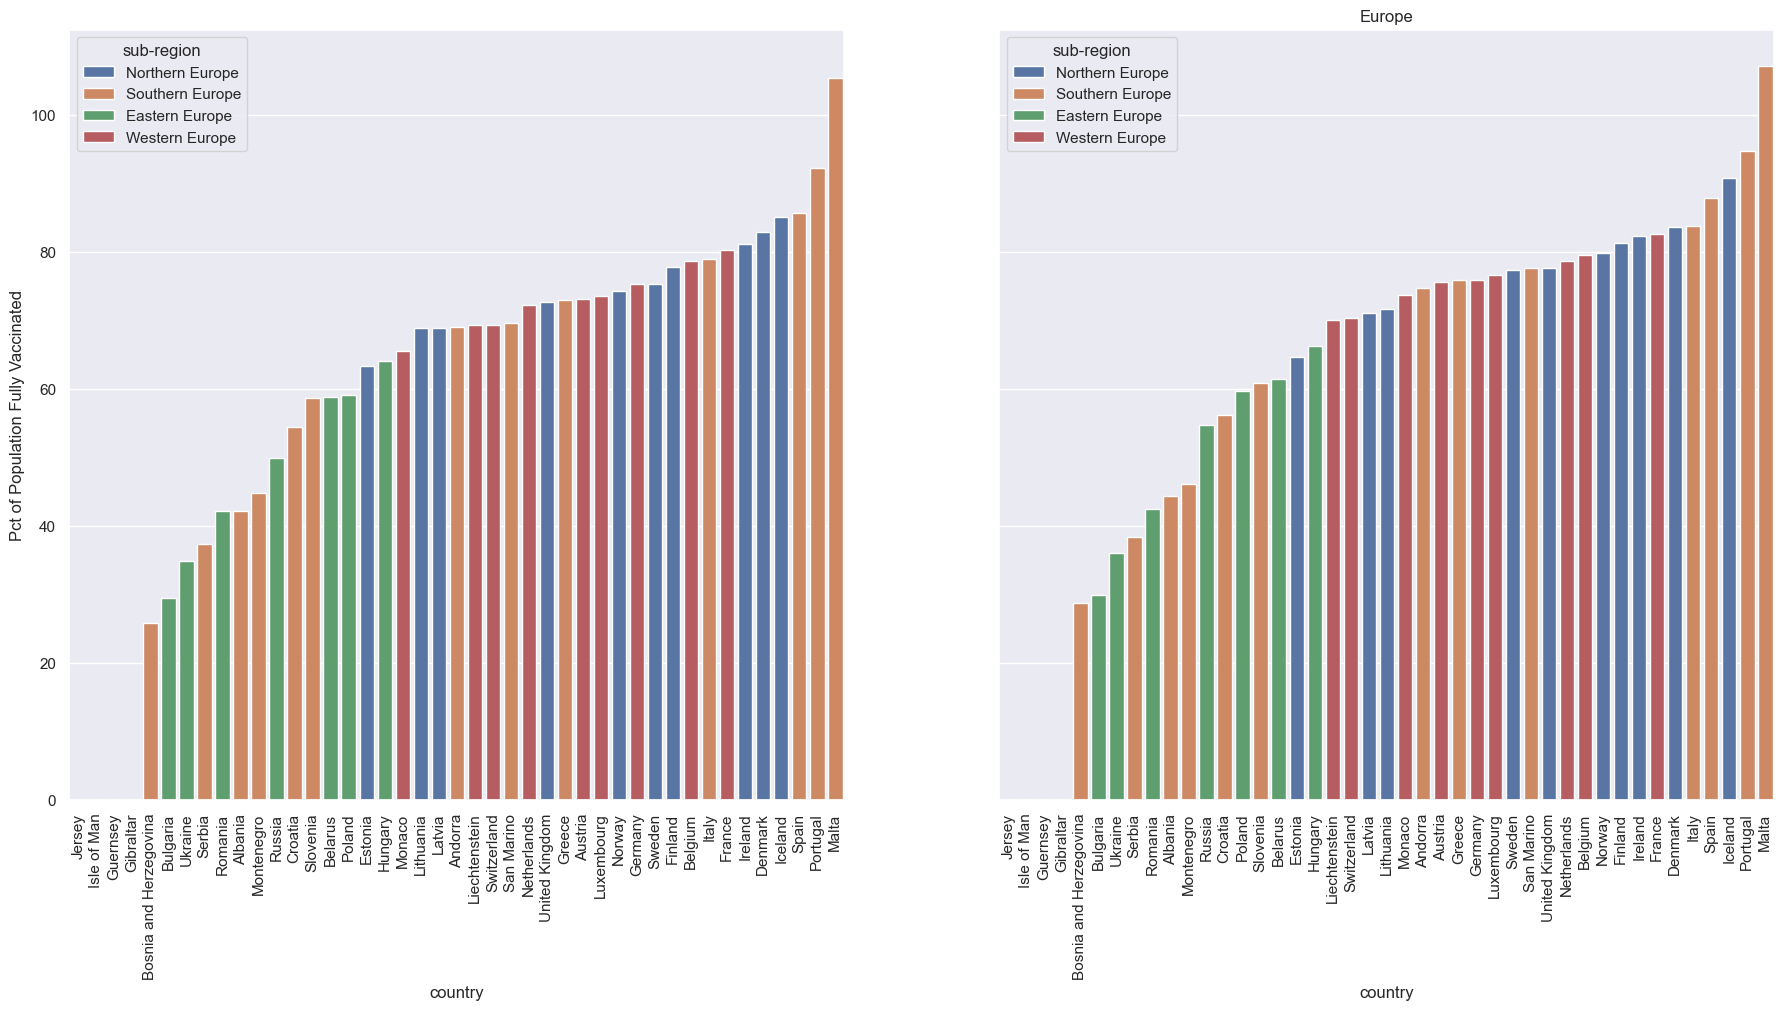

<Figure size 640x480 with 0 Axes>

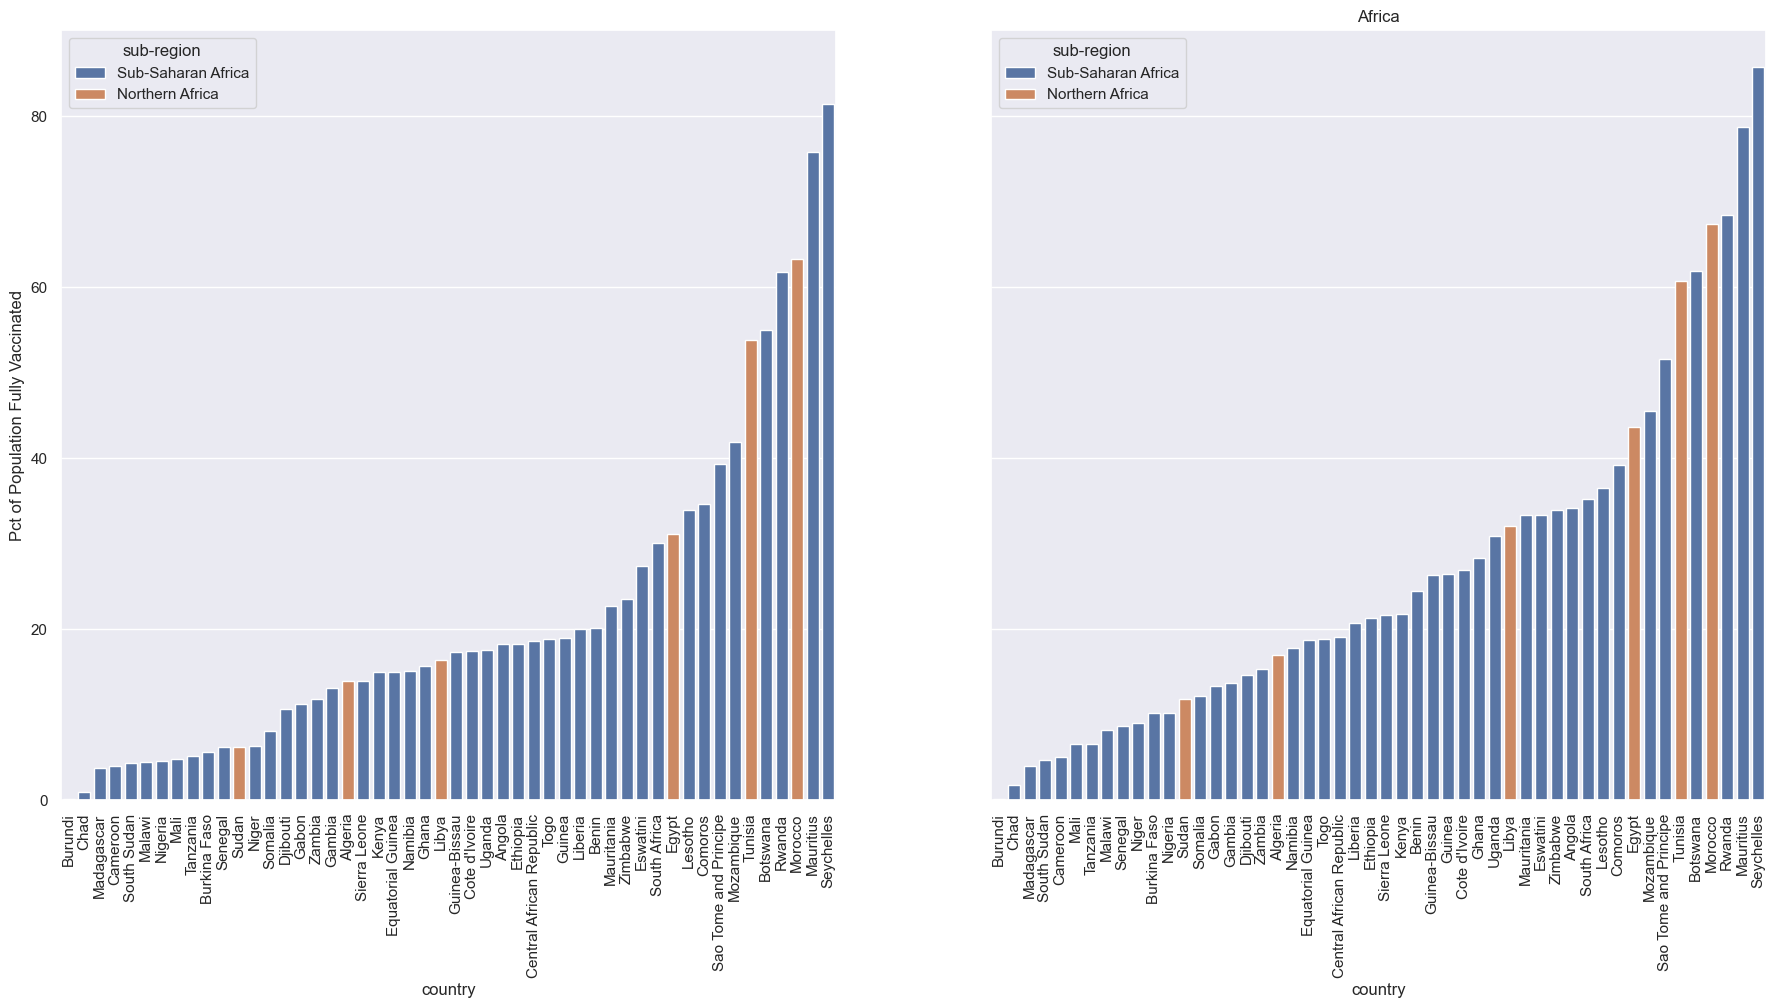

<Figure size 640x480 with 0 Axes>

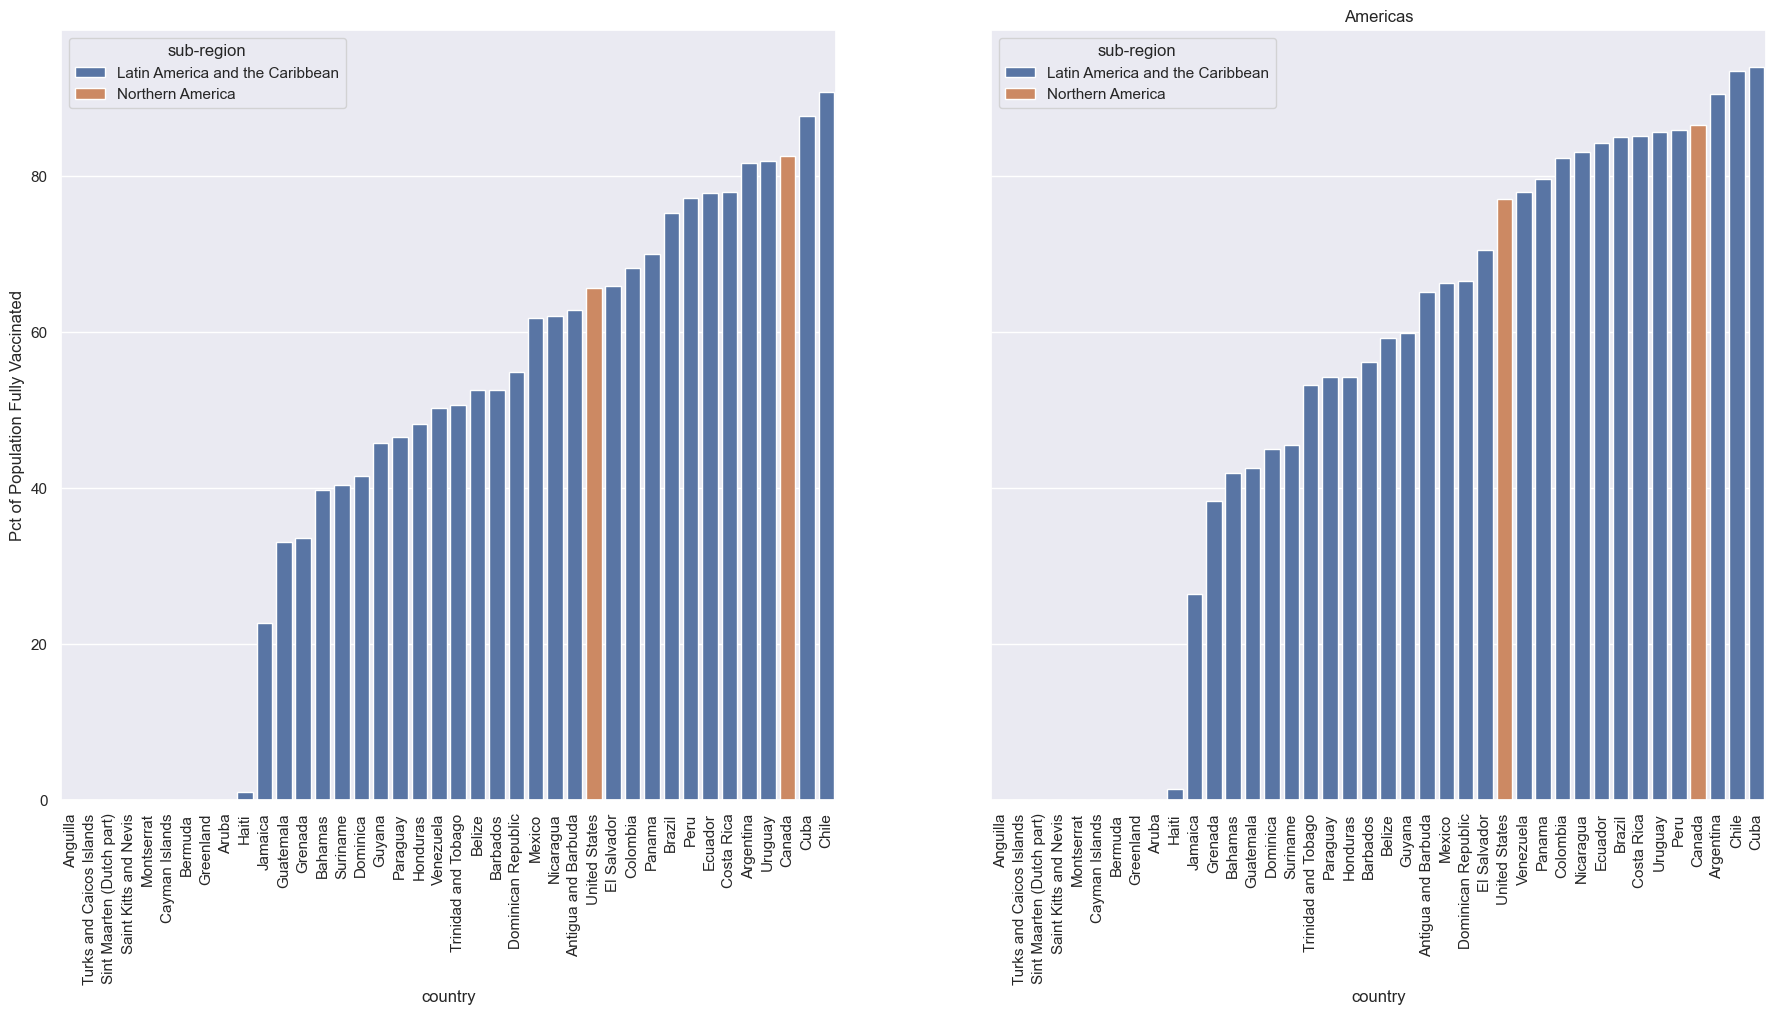

<Figure size 640x480 with 0 Axes>

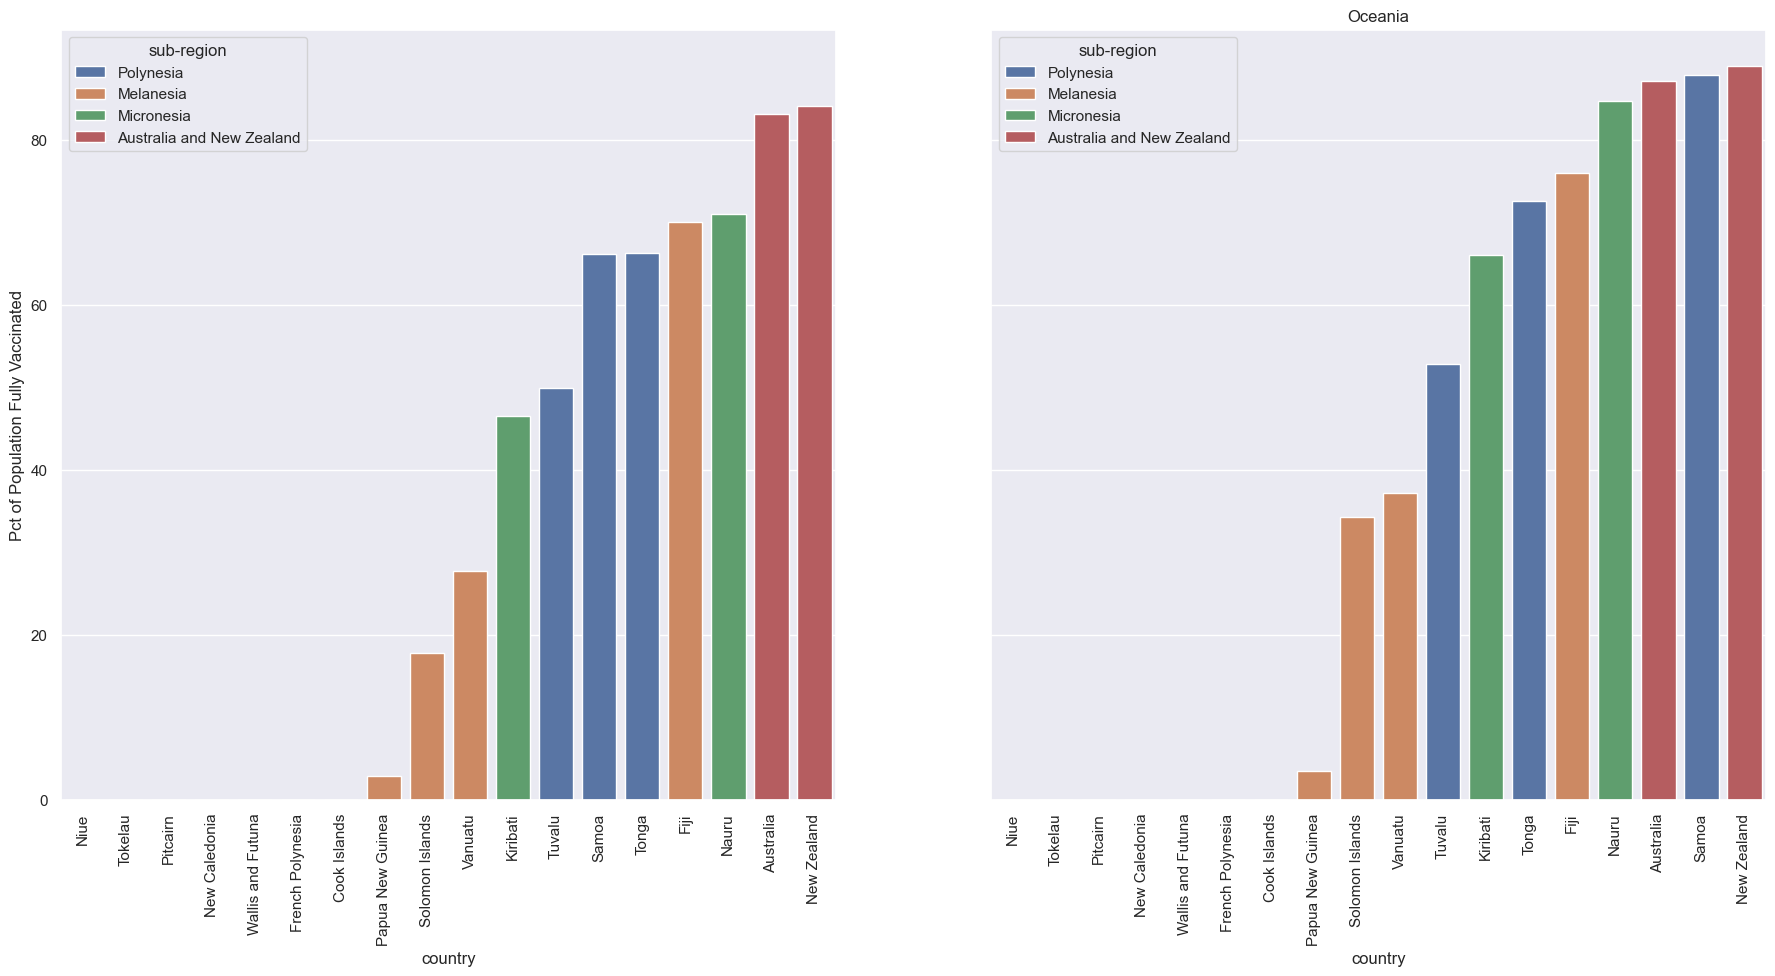

In [11]:
vaccines_man_agg = vaccinesby_manufacturer.groupby(['country', 'vaccine']).agg(countryTotalByVaccine = ('total_vaccinations', 'sum')).reset_index()
vaccines_man_merged = pd.merge(vaccines_man_agg, country_total[['region', 'country']], on='country', how='inner')
#vaccines_man_merged = vaccines_man_merged.pivot(index=['country', 'sub-region','region'], columns='vaccine', values='countryTotalByVaccine')
vaccines_man_merged =vaccines_man_merged.reset_index().fillna(0)
#vaccines_man_merged = vaccines_man_merged.melt(index=['country', 'sub-region','region'], var_name='cols',  value_name='vals')
print(vaccines_man_merged.columns)
print(vaccines_man_merged[vaccines_man_merged['country']=='Cyprus'])
#exit()


#country_populations['pop2019'] = country_populations['pop2019'].apply(lambda x:x*1000000)

#convert date column into data time
vaccinations['date'] = pd.to_datetime(vaccinations['date'], unit ='ns')

#joining both the datasets
vaccinations_new = pd.merge(vaccinations, country_pop2020, on='country', how='left')
vaccinations_merged = pd.merge(vaccinations_new, country_total, on='country', how='left')
vaccinations_merged['Population_2020'] = vaccinations_merged['Population_2020'].fillna(0)
#unique will give you unique values in a column, nunique will give you the count of unique values
#for i in (vaccinations_merged['country'] + ' '+ vaccinations_merged['vaccines']).unique():
 #   print(i)
#exit()

#group by syntax, grouping by country and summing up total vaccinations
#the below syntax will group the whole data in the dataframe
full_vaccinations= vaccinations_merged.groupby(['country','sub-region','region', 'Population_2020'])\
.agg(
     CountryTotal = ('people_fully_vaccinated','max'),
     CountryTotal2 = ('people_vaccinated','max'),
 ).reset_index()
full_vaccinations[['CountryTotal', 'CountryTotal2']] = full_vaccinations[['CountryTotal', 'CountryTotal2']].fillna(0)
#full_vaccinations['Population_2020'] = full_vaccinations['Population_2020'].fillna(0)
#full_vaccinations.set_index(['region', 'sub-region'], inplace=True)
#print(full_vaccinations.head())
#exit()

#the below syntax will group the data and add the result in a new column in the existing dataframe
#vaccinations_merged['CountryTotal']= vaccinations_merged.groupby(['country','sub-region','region'])["people_fully_vaccinated"].transform('max')

full_vaccinations['PctPopFullyVaccinated'] = full_vaccinations.apply(lambda x: round((x['CountryTotal']/x['Population_2020'])*100,2) if ((x['Population_2020'] != 0.0)) else 0.0, axis=1)
full_vaccinations['PctPopVaccineOneDose'] = full_vaccinations.apply(lambda x: round((x['CountryTotal2']/x['Population_2020'])*100,2) if ((x['Population_2020'] != 0.0)) else 0.0, axis=1)

def millions(x, pos):
    """The two args are the value and tick position."""
    if x >= 1000000000:
        val = round(x / 1000000000, 1)
        new_tick_format = '{:}B'.format(val)
    elif x >= 1000000:
        val = round(x / 1000000, 1)
        new_tick_format = '{:}M'.format(val)
    elif x >= 1000:
        val = round(x / 1000, 1)
        new_tick_format = '{:}K'.format(val)
    elif x < 1000:
        new_tick_format = round(x, 1)
    else:
        new_tick_format = x

        # make new_tick_format into a string value
    new_tick_format = str(new_tick_format)

    # code below will keep 4.5M as is but change values such as 4.0M to 4M since that zero after the decimal isn't needed
    index_of_decimal = new_tick_format.find(".")

    if index_of_decimal != -1:
        value_after_decimal = new_tick_format[index_of_decimal + 1]
        if value_after_decimal == "0":
            # remove the 0 after the decimal point since it's not needed
            new_tick_format = new_tick_format[0:index_of_decimal] + new_tick_format[index_of_decimal + 2:]
    return new_tick_format

for i in vaccines_man_merged['region'].unique():
    print(i)
    sns.set_theme(style="darkgrid")
    inter_df = vaccines_man_merged.loc[(vaccines_man_merged['region']==i)]
    print(inter_df.head())
    plt.figure(figsize=(20, 10))
    fig, ax = plt.subplots(figsize=(20, 10))
    sns.barplot(data=inter_df, y='vaccine', x='countryTotalByVaccine',hue = 'country', dodge=False, palette="hls")
    plt.xticks(rotation = 90)
    #plt.yticks(rotation=90)
    #plt.legend([i])
    ax.xaxis.set_major_formatter(millions)
    plt.ylabel("Vaccine")
    plt.xlabel("Number of Vaccines Administered")
    #plt.yticks([0, 50000000, 100000000], ['zero', '50M', '100M'])
    #This will remove the exponential on the large numbers for the Y axis.
   # plt.ticklabel_format(useOffset=False, axis='x', style='sci',scilimits=(0,0))
    #plt.ylim()

    #plt.show()
    inter_df= ''

for i in full_vaccinations['region'].unique():
    print(i)
    interim_df = full_vaccinations.loc[(full_vaccinations['region']==i) ].sort_values('PctPopFullyVaccinated')
    #splitting vaccines data/
    plt.figure(figsize=(8, 6), dpi=80)
    fig, ax = plt.subplots(1, 2, sharey=True, figsize=(22, 10))
    sns.barplot(data=interim_df, x= 'country',y='PctPopFullyVaccinated', hue='sub-region', order= interim_df['country'],
                    dodge=False, ax=ax[0])
    ax[0].set_ylabel('Pct of Population Fully Vaccinated')
    #ax[0].set_xticks()
    ax[0].tick_params('x', labelrotation=90)
    #g.map(sns.barplot, "country", "PctPopVaccinated", alpha=.7)
    #g.add_legend()
    interim_df2 = full_vaccinations.loc[(full_vaccinations['region'] == i)].sort_values('PctPopVaccineOneDose')
    sns.barplot(data=interim_df2, x='country', y='PctPopVaccineOneDose', hue='sub-region',order=interim_df2['country'],
                        dodge=False, ax=ax[1])
    ax[1].set_ylabel('Pct of Pop that Received One Dose')
    #g.set(xlabel='Country', ylabel='Percentage of Population Fully Vaccinated')
    ax[1].tick_params('x', labelrotation=90)
    plt.title(i)
    #plt.show()
    interim_df = ''
    interim_df2 = ''

''' 
    if x < 1000000:
    #Anything less than a million
        return  '{:1.0f}K'.format(x * 1e-3)
    elif (x >= 1000000 and x < 1000000000):
    #Anything less than a billion
        return '{:1.0f}M'.format(x * 1e-6)
    else:
    #At least a billion
        return '{:1.0f}B'.format(x * 1e-10)
'''